In [1]:
# Import pandas and matplotlib for data visualisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data from csv. The first data is the title.basics file
df_title=pd.read_csv('Documents/Project One/Data/title.basics.csv')

In [3]:
# Below we can have the first 5 rows of the data frame
df_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
# Check the dimension of data frames in columns and rows
df_title.shape

(146144, 6)

In [5]:
# Check if we have duplicates in our data frame
df_title.duplicated().value_counts()

False    146144
Name: count, dtype: int64

In [6]:
# Below will show the concise summary of data frame
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [7]:
#lets split the names of genres
lst_col = 'genres' 
df_x = df_title.assign(**{lst_col:df_title[lst_col].str.split(',')})
df_x

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,[Drama]
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,[Documentary]
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,[Comedy]
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [8]:
# Now the genres column will be split by each category
df_x.explode('genres', ignore_index=True)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama
...,...,...,...,...,...,...
234953,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
234954,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
234955,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
234956,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [9]:
df_title1=df_x.explode('genres', ignore_index=True)
df_title1.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama


In [10]:
# Import the next data base boom.movie
df_boom=pd.read_csv('Documents/Project One/Data/bom.movie_gross.csv')

In [11]:
# Below we can have the first 5 rows of the data frame
df_boom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [12]:
# Check the dimension of data frames in columns and rows
df_boom.shape

(3387, 5)

In [13]:
# Check if we have duplicates in our data frame
df_boom.duplicated().value_counts()

False    3387
Name: count, dtype: int64

In [14]:
# Below will show the concise summary of data frame
df_boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [15]:
# Replace dollar sign and commas for foreign_gross column
df_boom['foreign_gross'] = df_boom['foreign_gross'].str.replace('$', '').str.replace(',', '')

In [16]:
# Convert the foreign_gross string column to float
df_boom['foreign_gross'] = df_boom['foreign_gross'].astype(float)
df_boom.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [17]:
# Create a new column for total revenue, for NAN values we want to sum up as zero values
df_boom['Total Revenue']=df_boom.fillna(0)['domestic_gross']+df_boom.fillna(0)['foreign_gross']
df_boom.head()

,title,studio,domestic_gross,foreign_gross,year,Total Revenue
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [18]:
df_boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
 5   Total Revenue   3387 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 158.9+ KB


In [19]:
# Convert date from integer to date
df_boom['year']=pd.to_datetime(df_boom['year'], format='%Y')

In [20]:
# Check if the change of date format is made
df_boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3387 non-null   object        
 1   studio          3382 non-null   object        
 2   domestic_gross  3359 non-null   float64       
 3   foreign_gross   2037 non-null   float64       
 4   year            3387 non-null   datetime64[ns]
 5   Total Revenue   3387 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 158.9+ KB


In [21]:
# Format the revenue data in millions (Total Revenue, domestic_gross, foreign_gross)
pd.options.display.float_format = '{:,.2f}'.format
df_boom['Total Revenue'] = df_boom['Total Revenue'] / 1000000 
df_boom.head()

,title,studio,domestic_gross,foreign_gross,year,Total Revenue
0,Toy Story 3,BV,"415,000,000.00","652,000,000.00",2010-01-01,"1,067.00"
1,Alice in Wonderland (2010),BV,"334,200,000.00","691,300,000.00",2010-01-01,"1,025.50"
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000.00","664,300,000.00",2010-01-01,960.30
3,Inception,WB,"292,600,000.00","535,700,000.00",2010-01-01,828.30
4,Shrek Forever After,P/DW,"238,700,000.00","513,900,000.00",2010-01-01,752.60


In [22]:
pd.options.display.float_format = '{:,.2f}'.format
df_boom['domestic_gross'] = df_boom['domestic_gross'] / 1000000 
df_boom.head()

,title,studio,domestic_gross,foreign_gross,year,Total Revenue
0,Toy Story 3,BV,415.00,"652,000,000.00",2010-01-01,"1,067.00"
1,Alice in Wonderland (2010),BV,334.20,"691,300,000.00",2010-01-01,"1,025.50"
2,Harry Potter and the Deathly Hallows Part 1,WB,296.00,"664,300,000.00",2010-01-01,960.30
3,Inception,WB,292.60,"535,700,000.00",2010-01-01,828.30
4,Shrek Forever After,P/DW,238.70,"513,900,000.00",2010-01-01,752.60


In [23]:
pd.options.display.float_format = '{:,.2f}'.format
df_boom['foreign_gross'] = df_boom['foreign_gross'] / 1000000 
df_boom.head()

,title,studio,domestic_gross,foreign_gross,year,Total Revenue
0,Toy Story 3,BV,415.00,652.00,2010-01-01,"1,067.00"
1,Alice in Wonderland (2010),BV,334.20,691.30,2010-01-01,"1,025.50"
2,Harry Potter and the Deathly Hallows Part 1,WB,296.00,664.30,2010-01-01,960.30
3,Inception,WB,292.60,535.70,2010-01-01,828.30
4,Shrek Forever After,P/DW,238.70,513.90,2010-01-01,752.60


In [24]:
# Import the next data base boom.movie
df_rate=pd.read_csv('Documents/Project One/Data/title.ratings.csv')

In [25]:
# Below we can have the first 5 rows of the data frame
df_rate.head()

,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


In [26]:
# Check the dimension of data frames frame in columns and rows
df_rate.shape

(73856, 3)

In [27]:
# Below will show the concise summary of data frame
df_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [28]:
# To merge the two data frames title and boom we have to have the exactly the same name of key columns
df_title1.rename(columns={'primary_title' : 'Title'}, inplace=True)
df_title1.head()

,tconst,Title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,Action
1,tt0063540,Sunghursh,Sunghursh,2013,175.00,Crime
2,tt0063540,Sunghursh,Sunghursh,2013,175.00,Drama
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,Biography
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,Drama


In [29]:
df_boom.rename(columns={'title' : 'Title'}, inplace=True)
df_boom.head()

,Title,studio,domestic_gross,foreign_gross,year,Total Revenue
0,Toy Story 3,BV,415.00,652.00,2010-01-01,"1,067.00"
1,Alice in Wonderland (2010),BV,334.20,691.30,2010-01-01,"1,025.50"
2,Harry Potter and the Deathly Hallows Part 1,WB,296.00,664.30,2010-01-01,960.30
3,Inception,WB,292.60,535.70,2010-01-01,828.30
4,Shrek Forever After,P/DW,238.70,513.90,2010-01-01,752.60


In [30]:
# Merge two data frames
df_merge=df_title1.merge(df_boom, on='Title', how='inner')
df_merge.head()

,tconst,Title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year,Total Revenue
0,tt0315642,Wazir,Wazir,2016,103.00,Action,Relbig.,1.10,NaN,2016-01-01,1.10
1,tt0315642,Wazir,Wazir,2016,103.00,Crime,Relbig.,1.10,NaN,2016-01-01,1.10
2,tt0315642,Wazir,Wazir,2016,103.00,Drama,Relbig.,1.10,NaN,2016-01-01,1.10
3,tt0337692,On the Road,On the Road,2012,124.00,Adventure,IFC,0.74,8.00,2012-01-01,8.74
4,tt0337692,On the Road,On the Road,2012,124.00,Drama,IFC,0.74,8.00,2012-01-01,8.74


In [31]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7473 entries, 0 to 7472
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tconst           7473 non-null   object        
 1   Title            7473 non-null   object        
 2   original_title   7473 non-null   object        
 3   start_year       7473 non-null   int64         
 4   runtime_minutes  7264 non-null   float64       
 5   genres           7433 non-null   object        
 6   studio           7467 non-null   object        
 7   domestic_gross   7421 non-null   float64       
 8   foreign_gross    4731 non-null   float64       
 9   year             7473 non-null   datetime64[ns]
 10  Total Revenue    7473 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 642.3+ KB


In [32]:
df_merge.describe()

,start_year,runtime_minutes,domestic_gross,foreign_gross,year,Total Revenue
count,"7,473.00","7,264.00","7,421.00","4,731.00",7473,"7,473.00"
mean,"2,013.91",106.67,33.89,83.93,2014-01-26 06:40:48.173424384,86.79
min,"2,010.00",2.00,0.00,0.00,2010-01-01 00:00:00,0.00
25%,"2,012.00",94.00,0.17,5.20,2012-01-01 00:00:00,0.46
50%,"2,014.00",105.00,2.90,23.10,2014-01-01 00:00:00,9.60
75%,"2,016.00",119.00,36.50,87.65,2016-01-01 00:00:00,82.10
max,"2,020.00",623.00,700.10,946.40,2018-01-01 00:00:00,"1,405.40"
std,2.51,22.90,70.96,144.79,NaN,184.26


In [33]:
# Now let's merge the dataframe above with rating dataframe
df_total=df_merge.merge(df_rate, on='tconst', how='left')
df_total.head()

,tconst,Title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year,Total Revenue,averagerating,numvotes
0,tt0315642,Wazir,Wazir,2016,103.00,Action,Relbig.,1.10,NaN,2016-01-01,1.10,7.10,"15,378.00"
1,tt0315642,Wazir,Wazir,2016,103.00,Crime,Relbig.,1.10,NaN,2016-01-01,1.10,7.10,"15,378.00"
2,tt0315642,Wazir,Wazir,2016,103.00,Drama,Relbig.,1.10,NaN,2016-01-01,1.10,7.10,"15,378.00"
3,tt0337692,On the Road,On the Road,2012,124.00,Adventure,IFC,0.74,8.00,2012-01-01,8.74,6.10,"37,886.00"
4,tt0337692,On the Road,On the Road,2012,124.00,Drama,IFC,0.74,8.00,2012-01-01,8.74,6.10,"37,886.00"


In [34]:
# Drop the column original_title, start_year as we dont need these columns
df_total=df_total.drop('original_title', axis=1)
df_total.head()

,tconst,Title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year,Total Revenue,averagerating,numvotes
0,tt0315642,Wazir,2016,103.00,Action,Relbig.,1.10,NaN,2016-01-01,1.10,7.10,"15,378.00"
1,tt0315642,Wazir,2016,103.00,Crime,Relbig.,1.10,NaN,2016-01-01,1.10,7.10,"15,378.00"
2,tt0315642,Wazir,2016,103.00,Drama,Relbig.,1.10,NaN,2016-01-01,1.10,7.10,"15,378.00"
3,tt0337692,On the Road,2012,124.00,Adventure,IFC,0.74,8.00,2012-01-01,8.74,6.10,"37,886.00"
4,tt0337692,On the Road,2012,124.00,Drama,IFC,0.74,8.00,2012-01-01,8.74,6.10,"37,886.00"


In [35]:
df_total=df_total.drop('start_year', axis=1)
df_total.head()

,tconst,Title,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year,Total Revenue,averagerating,numvotes
0,tt0315642,Wazir,103.00,Action,Relbig.,1.10,NaN,2016-01-01,1.10,7.10,"15,378.00"
1,tt0315642,Wazir,103.00,Crime,Relbig.,1.10,NaN,2016-01-01,1.10,7.10,"15,378.00"
2,tt0315642,Wazir,103.00,Drama,Relbig.,1.10,NaN,2016-01-01,1.10,7.10,"15,378.00"
3,tt0337692,On the Road,124.00,Adventure,IFC,0.74,8.00,2012-01-01,8.74,6.10,"37,886.00"
4,tt0337692,On the Road,124.00,Drama,IFC,0.74,8.00,2012-01-01,8.74,6.10,"37,886.00"


In [36]:
# Check the info of the new database
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7473 entries, 0 to 7472
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tconst           7473 non-null   object        
 1   Title            7473 non-null   object        
 2   runtime_minutes  7264 non-null   float64       
 3   genres           7433 non-null   object        
 4   studio           7467 non-null   object        
 5   domestic_gross   7421 non-null   float64       
 6   foreign_gross    4731 non-null   float64       
 7   year             7473 non-null   datetime64[ns]
 8   Total Revenue    7473 non-null   float64       
 9   averagerating    6987 non-null   float64       
 10  numvotes         6987 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 642.3+ KB


In [37]:
# Check the statistics data of dataframe
df_total.describe()

,runtime_minutes,domestic_gross,foreign_gross,year,Total Revenue,averagerating,numvotes
count,"7,264.00","7,421.00","4,731.00",7473,"7,473.00","6,987.00","6,987.00"
mean,106.67,33.89,83.93,2014-01-26 06:40:48.173424384,86.79,6.45,"72,041.77"
min,2.00,0.00,0.00,2010-01-01 00:00:00,0.00,1.60,5.00
25%,94.00,0.17,5.20,2012-01-01 00:00:00,0.46,5.90,"3,789.00"
50%,105.00,2.90,23.10,2014-01-01 00:00:00,9.60,6.50,"18,928.00"
75%,119.00,36.50,87.65,2016-01-01 00:00:00,82.10,7.10,"78,184.00"
max,623.00,700.10,946.40,2018-01-01 00:00:00,"1,405.40",9.20,"1,841,066.00"
std,22.90,70.96,144.79,NaN,184.26,0.99,"134,929.27"


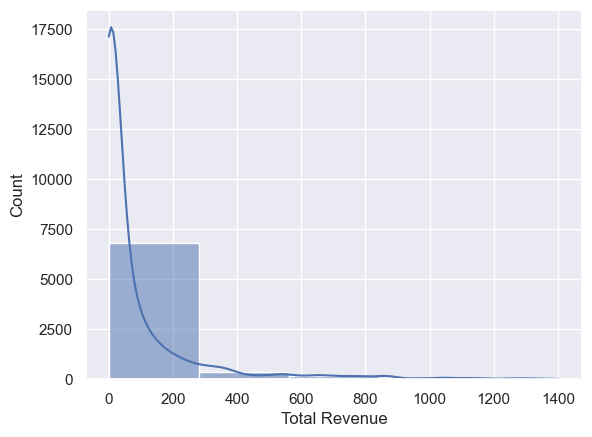

In [46]:
# Lets have a look at the data we have
# Create histogram for total Revenue
import seaborn as sns
sns.histplot(data=df_total, x="Total Revenue", kde=True, bins=5)
sns.set_theme(style='darkgrid', font_scale=1)
# The data for total revenue are not normally distributed but left skewed

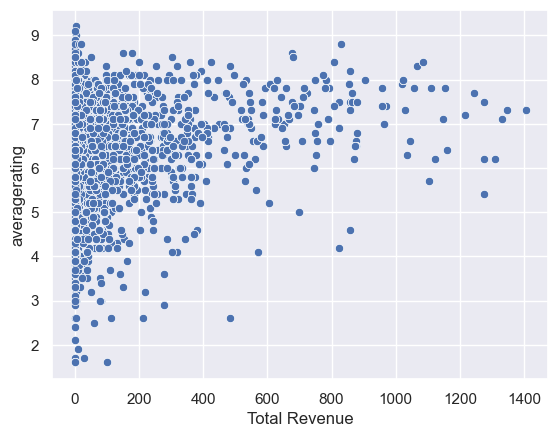

In [42]:
# The correlation between total revenue and average ratings
import seaborn as sns
sns.scatterplot(data=df_total, x="Total Revenue", y="averagerating")
sns.set_theme(style='darkgrid', font_scale=1)

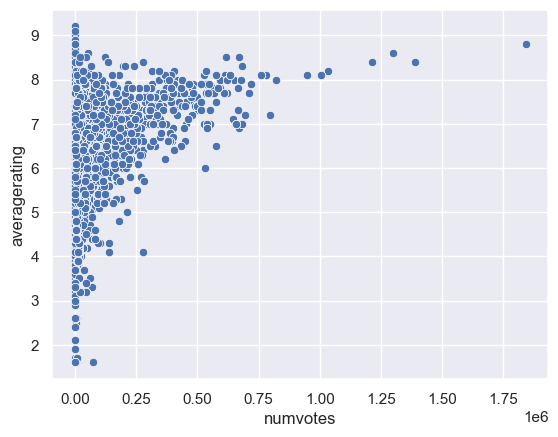

In [43]:
# Lets have a look ate the correlation between num of votes and average ratings
sns.scatterplot(data=df_total, x="numvotes", y="averagerating")
sns.set_theme(style='dark', font_scale=1)

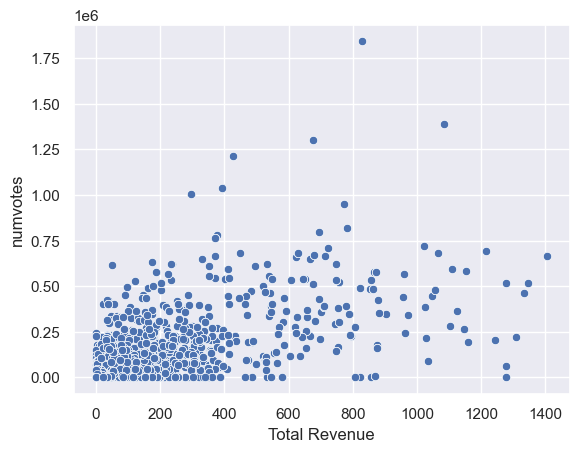

In [45]:
# Lets have a look ate the correlation between num of votes and Total Revenue(No correlation)
sns.scatterplot(data=df_total, y="numvotes", x="Total Revenue")
sns.set_theme(style='darkgrid', font_scale=1)

In [47]:
# We will find top ten movies according total revenue
df11=df_boom.groupby('Title')['Total Revenue'].sum().reset_index()
df12=df11.sort_values('Total Revenue', ascending=False)
df12

,Title,Total Revenue
1622,Marvel's The Avengers,"1,518.90"
274,Avengers: Age of Ultron,"1,405.40"
387,Black Panther,"1,347.00"
1065,Harry Potter and the Deathly Hallows Part 2,"1,341.50"
2317,Star Wars: The Last Jedi,"1,332.60"
...,...,...
31,2:22,0.00
2160,Satanic,0.00
1793,News From Planet Mars,0.00
2512,The Chambermaid,0.00


In [48]:
# Reset the index of dataframe
df13=df12.reset_index(drop=True)
df13

,Title,Total Revenue
0,Marvel's The Avengers,"1,518.90"
1,Avengers: Age of Ultron,"1,405.40"
2,Black Panther,"1,347.00"
3,Harry Potter and the Deathly Hallows Part 2,"1,341.50"
4,Star Wars: The Last Jedi,"1,332.60"
...,...,...
3381,2:22,0.00
3382,Satanic,0.00
3383,News From Planet Mars,0.00
3384,The Chambermaid,0.00


In [49]:
# Filter top ten Movie titles and revenue
df_top_tenmovies=df13.iloc[0:9]
df_top_tenmovies

,Title,Total Revenue
0,Marvel's The Avengers,"1,518.90"
1,Avengers: Age of Ultron,"1,405.40"
2,Black Panther,"1,347.00"
3,Harry Potter and the Deathly Hallows Part 2,"1,341.50"
4,Star Wars: The Last Jedi,"1,332.60"
5,Jurassic World: Fallen Kingdom,"1,309.50"
6,Frozen,"1,276.40"
7,Beauty and the Beast (2017),"1,263.50"
8,Incredibles 2,"1,242.80"


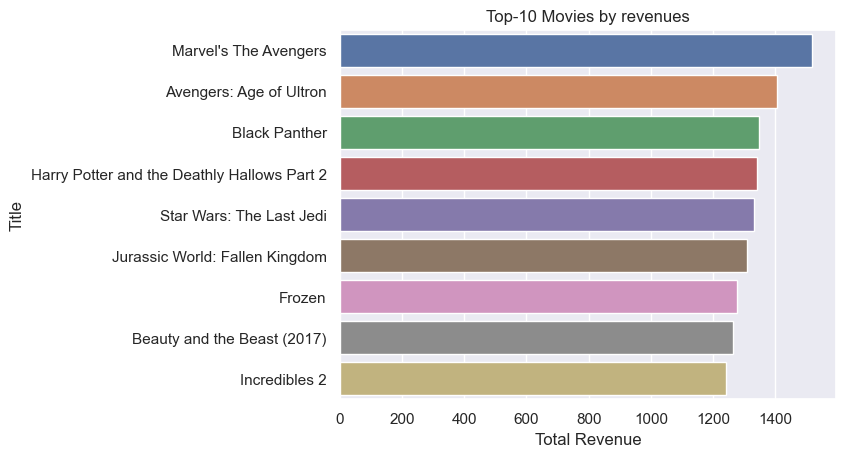

In [50]:
# Vizualise the top ten movies by total Revenue in graph
sns.barplot(data=df_top_tenmovies, x="Total Revenue", y="Title").set_title('Top-10 Movies by revenues')
sns.set_theme(style='darkgrid', font_scale=1)

In [51]:
# Now we will prepare the three insight for Microsoft Company
# Group the Genres by total revenue for the last 5 years
df_genres_year=(df_total.loc[df_total['year'].isin(['2014', '2015', '2016',' 2017', '2018'])])
df_genres_year

,tconst,Title,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year,Total Revenue,averagerating,numvotes
0,tt0315642,Wazir,103.00,Action,Relbig.,1.10,NaN,2016-01-01,1.10,7.10,"15,378.00"
1,tt0315642,Wazir,103.00,Crime,Relbig.,1.10,NaN,2016-01-01,1.10,7.10,"15,378.00"
2,tt0315642,Wazir,103.00,Drama,Relbig.,1.10,NaN,2016-01-01,1.10,7.10,"15,378.00"
14,tt0365907,A Walk Among the Tombstones,114.00,Action,Uni.,26.30,26.90,2014-01-01,53.20,6.50,"105,116.00"
15,tt0365907,A Walk Among the Tombstones,114.00,Crime,Uni.,26.30,26.90,2014-01-01,53.20,6.50,"105,116.00"
...,...,...,...,...,...,...,...,...,...,...,...
7466,tt8427036,Helicopter Eela,135.00,Drama,Eros,0.07,NaN,2018-01-01,0.07,5.40,673.00
7469,tt9078374,Last Letter,114.00,Drama,CL,0.18,NaN,2018-01-01,0.18,6.40,322.00
7470,tt9078374,Last Letter,114.00,Romance,CL,0.18,NaN,2018-01-01,0.18,6.40,322.00
7471,tt9151704,Burn the Stage: The Movie,84.00,Documentary,Trafalgar,4.20,16.10,2018-01-01,20.30,8.80,"2,067.00"


In [52]:
# Check the top ten genres for the last 5 years
df20=df_genres_year.groupby('genres')['Total Revenue'].sum().reset_index()
df21=df20.sort_values('Total Revenue', ascending=False)
df21

,genres,Total Revenue
1,Adventure,"72,631.05"
0,Action,"67,962.02"
4,Comedy,"46,066.58"
7,Drama,"43,267.70"
17,Sci-Fi,"24,364.85"
2,Animation,"21,837.06"
19,Thriller,"18,429.31"
9,Fantasy,"16,003.18"
11,Horror,"10,241.03"
5,Crime,"10,159.15"


In [53]:
# Create a new dataframe for top ten genres acording the total revenue
df_topgenres=df_genres_year.loc[df_genres_year ['genres'].isin(['Adventure', 'Action', 'Comedy', 'Drama', 'Animation', 'Sci-Fi', 'Thriller', 'Fantasy', 'Crime', 'Horror'])]
df_topgenres

,tconst,Title,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year,Total Revenue,averagerating,numvotes
0,tt0315642,Wazir,103.00,Action,Relbig.,1.10,NaN,2016-01-01,1.10,7.10,"15,378.00"
1,tt0315642,Wazir,103.00,Crime,Relbig.,1.10,NaN,2016-01-01,1.10,7.10,"15,378.00"
2,tt0315642,Wazir,103.00,Drama,Relbig.,1.10,NaN,2016-01-01,1.10,7.10,"15,378.00"
14,tt0365907,A Walk Among the Tombstones,114.00,Action,Uni.,26.30,26.90,2014-01-01,53.20,6.50,"105,116.00"
15,tt0365907,A Walk Among the Tombstones,114.00,Crime,Uni.,26.30,26.90,2014-01-01,53.20,6.50,"105,116.00"
...,...,...,...,...,...,...,...,...,...,...,...
7462,tt8267604,Capernaum,126.00,Drama,SPC,1.70,NaN,2018-01-01,1.70,8.50,"20,215.00"
7463,tt8290698,The Spy Gone North,137.00,Drama,CJ,0.50,NaN,2018-01-01,0.50,7.20,"1,620.00"
7464,tt8331988,The Chambermaid,102.00,Drama,FM,0.00,NaN,2015-01-01,0.00,7.10,147.00
7466,tt8427036,Helicopter Eela,135.00,Drama,Eros,0.07,NaN,2018-01-01,0.07,5.40,673.00


In [72]:
# Pivot data for years and top 10 genres by revenue
table_top10=(pd.pivot_table(df_topgenres, index='year', columns= 'genres', values='Total Revenue', aggfunc=np.sum))
table_top10

genres,Action,Adventure,Animation,Comedy,Crime,Drama,Fantasy,Horror,Sci-Fi,Thriller
year,,,,,,,,,,
2014-01-01,"13,812.37","13,517.46","3,936.18","6,771.48","2,011.97","9,004.69","1,673.58","1,022.60","6,344.20","3,585.18"
2015-01-01,"11,159.16","13,172.55","3,843.97","9,968.86","3,152.86","9,634.24",587.02,"1,594.49","4,649.07","4,417.44"
2016-01-01,"14,075.23","16,008.26","6,461.99","10,703.76","1,777.22","8,329.66","3,812.05","1,876.27","4,081.38","2,310.07"
2017-01-01,"15,245.77","15,488.08","4,420.82","10,289.84","1,658.46","9,399.29","6,358.87","3,402.51","3,420.97","4,114.92"
2018-01-01,"13,669.50","14,444.71","3,174.09","8,332.64","1,558.64","6,899.82","3,571.66","2,345.16","5,869.24","4,001.71"


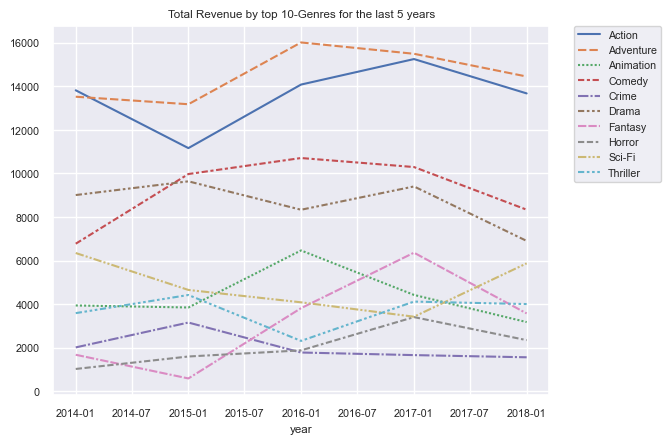

In [73]:
# Visualize the data
sns.lineplot(data=table_top10).set_title('Total Revenue by top 10-Genres for the last 5 years')
sns.set_theme(style='darkgrid', font_scale=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [63]:
# Group the Genres by average ratings
df5=df_total.groupby('genres')['averagerating'].mean().reset_index()
df6=df5.sort_values('averagerating', ascending=False)
df6

,genres,averagerating
6,Documentary,7.29
15,News,7.10
3,Biography,6.97
10,History,6.88
18,Sport,6.87
20,War,6.80
12,Music,6.76
2,Animation,6.70
7,Drama,6.59
21,Western,6.56


In [64]:
# Reset the index
df7=df6.reset_index(drop=True)
df7

,genres,averagerating
0,Documentary,7.29
1,News,7.10
2,Biography,6.97
3,History,6.88
4,Sport,6.87
5,War,6.80
6,Music,6.76
7,Animation,6.70
8,Drama,6.59
9,Western,6.56


In [65]:
# Filter top ten genres and averating
df_gen_avrating=df7.iloc[0:9]
df_gen_avrating

,genres,averagerating
0,Documentary,7.29
1,News,7.10
2,Biography,6.97
3,History,6.88
4,Sport,6.87
5,War,6.80
6,Music,6.76
7,Animation,6.70
8,Drama,6.59


Text(0.5, 1.0, 'Average Rating by Genres')

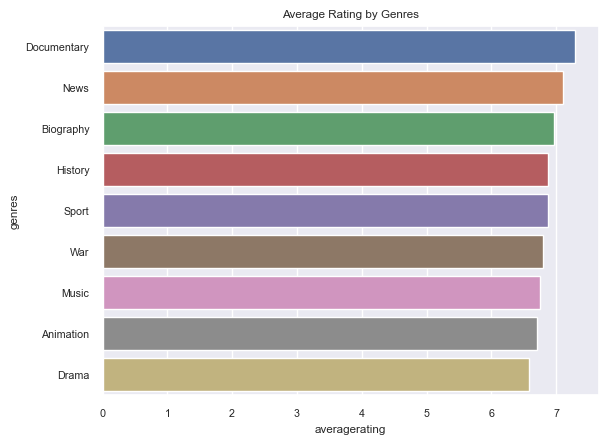

In [66]:
# Visualize the top ten genres by average rating in a bar graph
sns.barplot(data=df_gen_avrating, x="averagerating", y="genres").set_title('Average Rating by Genres')

In [67]:
# Group the studios by total revenue
df8=df_boom.groupby('studio')['Total Revenue'].sum().reset_index()
df9=df8.sort_values('Total Revenue', ascending=False)
df9

,studio,Total Revenue
36,BV,"44,212.88"
93,Fox,"31,005.37"
246,WB,"30,835.95"
238,Uni.,"29,757.16"
215,Sony,"22,405.04"
...,...,...
34,BSM,0.01
224,TAFC,0.00
111,Hiber,0.00
6,ALP,0.00


In [68]:
# Reset the index
df10=df9.reset_index(drop=True)
df10

,studio,Total Revenue
0,BV,"44,212.88"
1,Fox,"31,005.37"
2,WB,"30,835.95"
3,Uni.,"29,757.16"
4,Sony,"22,405.04"
...,...,...
252,BSM,0.01
253,TAFC,0.00
254,Hiber,0.00
255,ALP,0.00


In [69]:
# Show top ten studios and total revenue
df_studio_rev=df10.iloc[0:9]
df_studio_rev

,studio,Total Revenue
0,BV,"44,212.88"
1,Fox,"31,005.37"
2,WB,"30,835.95"
3,Uni.,"29,757.16"
4,Sony,"22,405.04"
5,Par.,"19,549.26"
6,WB (NL),"10,334.70"
7,LGF,"8,601.58"
8,LG/S,"5,431.92"


Text(0.5, 1.0, 'Total Revenue by Studio')

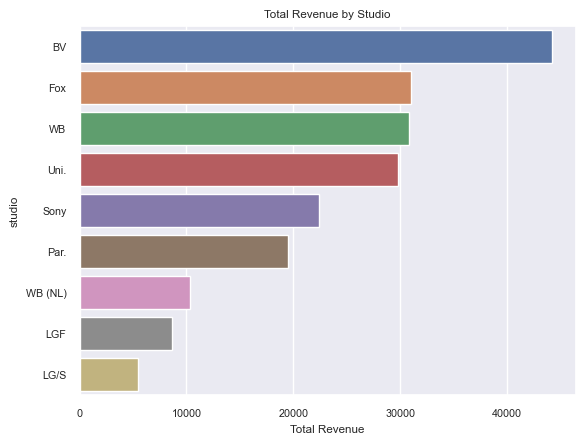

In [70]:
# Visualize the top ten studios by total revenue in a bar graph
sns.barplot(data=df_studio_rev, x="Total Revenue", y="studio").set_title('Total Revenue by Studio')